<a href="https://colab.research.google.com/github/xunzxe/first-repository/blob/master/Datathon/ClusterAnalysis_Water_Polo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 가져오기

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')
from sklearn.cluster import KMeans
import math

In [ ]:
# 데이터셋 pandas로 불러오기

athlete_path = "/content/athlete_events.csv"
athlete_data = pd.read_csv(athlete_path)
athlete = athlete_data.copy()
print(athlete.shape)
athlete.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# 결측치 처리하기

athlete['Medal'].fillna('No', inplace=True)
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No


In [ ]:
# 하계 올림픽 데이터셋

summer = athlete[athlete["Season"] == "Summer"].reset_index(drop=True)
print(summer.shape)
print(len(set(summer["Sport"])))
summer.head()

(222552, 15)
52


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No


In [ ]:
# 'Water Polo' 선수 정보로 이루어진 데이터셋 만들기

WaterPolo = summer[summer["Sport"] == "Water Polo"].reset_index(drop=True)
X = WaterPolo[['Sex', 'Age', 'Height', 'Weight', 'Year','Medal']]
X = X.dropna()
medal_mapping = {'No': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3}
X['Medal'] = X['Medal'].map(medal_mapping)

print(X.shape)
X.head(30)

(2719, 6)


,Sex,Age,Height,Weight,Year,Medal
1,M,22.0,186.0,83.0,1996,3
2,F,28.0,171.0,64.0,2012,0
3,M,30.0,186.0,100.0,2004,0
8,M,25.0,188.0,92.0,2004,0
12,M,34.0,178.0,74.0,1976,0
15,F,21.0,175.0,75.0,2016,0
19,M,18.0,176.0,78.0,1984,0
20,M,21.0,172.0,67.0,2016,0
22,M,19.0,194.0,103.0,1996,0
23,M,23.0,194.0,103.0,2000,0


In [ ]:
# BMI 계산 (BMI = 몸무게(kg) / (키(m)^2))
X['BMI'] = X['Weight'] / (X['Height'] / 100) ** 2
X.head()

,Sex,Age,Height,Weight,Year,Medal,BMI
1,M,22.0,186.0,83.0,1996,3,23.991213
2,F,28.0,171.0,64.0,2012,0,21.887076
3,M,30.0,186.0,100.0,2004,0,28.905076
8,M,25.0,188.0,92.0,2004,0,26.029878
12,M,34.0,178.0,74.0,1976,0,23.355637


In [ ]:
# 여성 데이터셋
X_female = X[X["Sex"] == "F"].reset_index(drop=True)
X_female = X_female[['Age', 'Height', 'Weight', 'Year','Medal','BMI']]
print(X_female.shape)
X_female.head(30)

(488, 6)


,Age,Height,Weight,Year,Medal,BMI
0,28.0,171.0,64.0,2012,0,21.887076
1,21.0,175.0,75.0,2016,0,24.489796
2,27.0,172.0,74.0,2016,2,25.013521
3,25.0,165.0,57.0,2000,1,20.936639
4,32.0,176.0,75.0,2000,0,24.212293
5,34.0,167.0,60.0,2004,3,21.513859
6,31.0,178.0,63.0,2000,1,19.883853
7,18.0,169.0,62.0,2012,0,21.707923
8,22.0,169.0,62.0,2016,0,21.707923
9,26.0,170.0,57.0,2008,0,19.723183


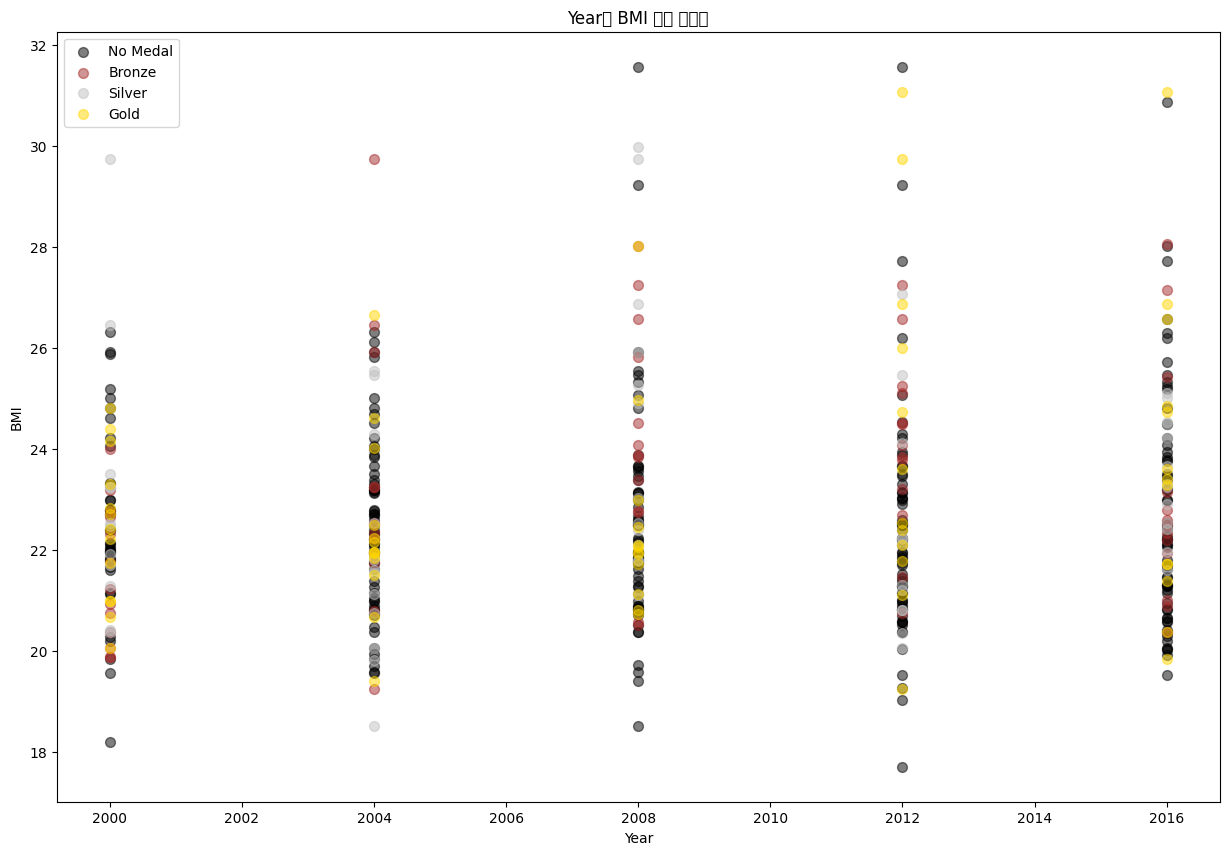

In [ ]:
# 색상 설정 (메달 종류에 따라 색상 다르게)
color_mapping = {0: 'black', 1: 'brown', 2: 'silver', 3: 'gold'}
X_female['Color'] = X_female['Medal'].map(color_mapping)

# BMI와 Year 간의 관계 시각화
plt.figure(figsize=(15, 10))
for medal, color in color_mapping.items():
    subset = X_female[X_female['Medal'] == medal]
    plt.scatter(subset['Year'], subset['BMI'], s=50, c=color, label=f'Medal {medal}', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('BMI')
plt.title('Year와 BMI 간의 산점도')
plt.legend(['No Medal', 'Bronze', 'Silver', 'Gold'])
plt.show()

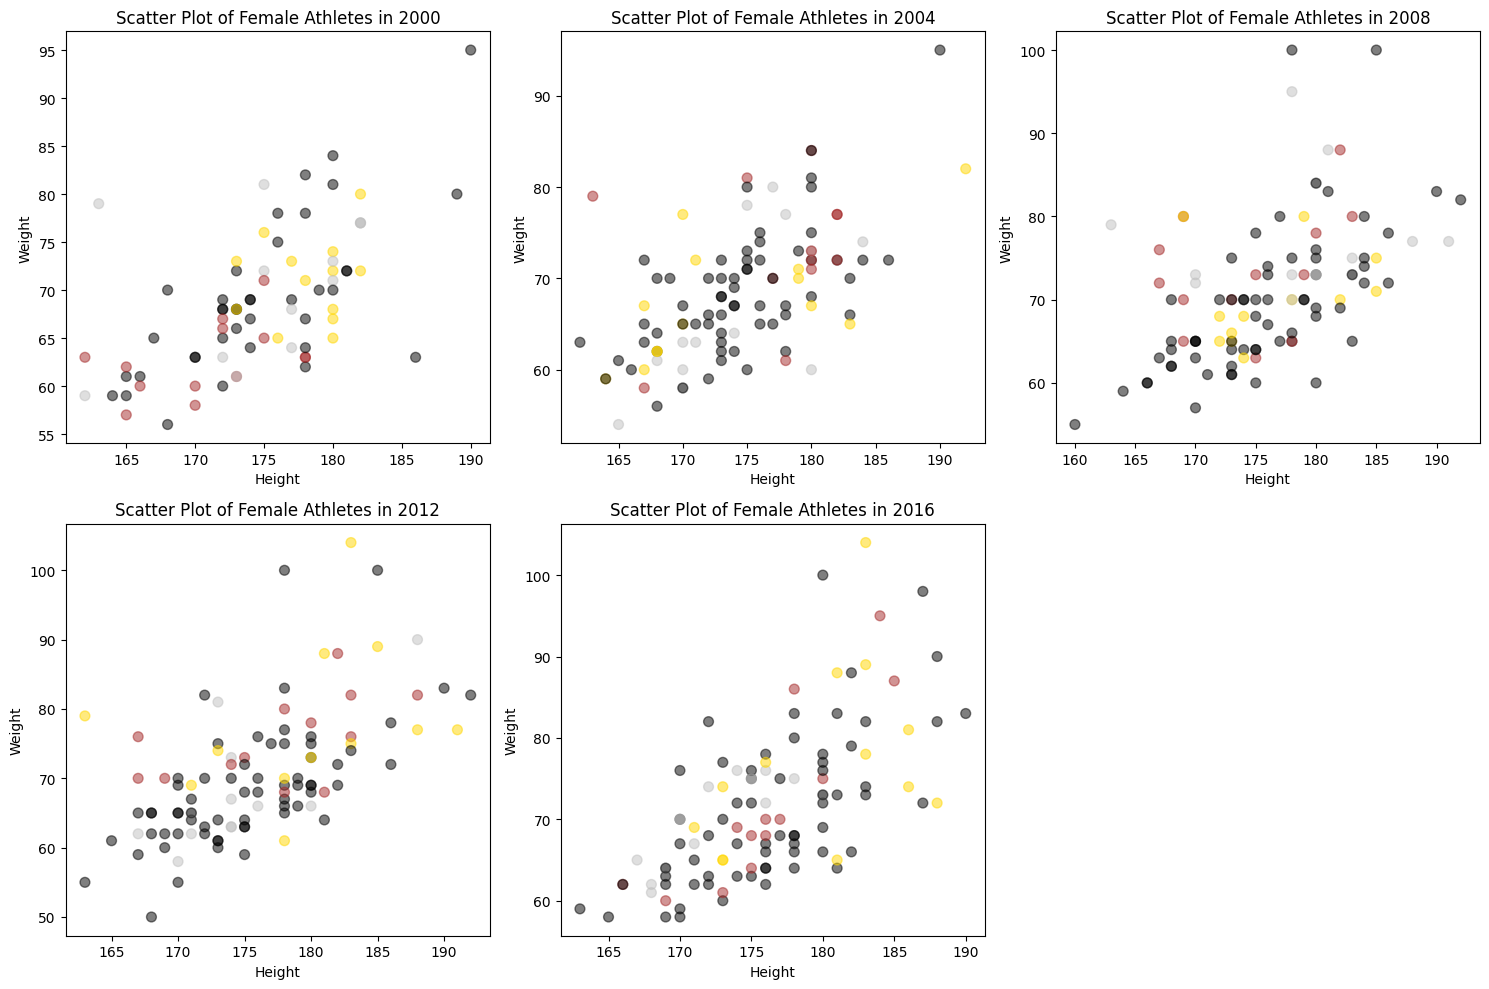

"\n# 클러스터 중심 표시\ncenters = kmeans.cluster_centers_\nplt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.75, marker='X', label='Centers')\n"

In [ ]:
# 군집 모델 적용
kmeans = KMeans(n_clusters=4, random_state=42)
X_female['Cluster'] = kmeans.fit_predict(X_female)

# 색상 설정 (메달 종류에 따라 색상 다르게)
color_mapping = {0: 'black', 1: 'brown', 2: 'silver', 3: 'gold'}
X_female['Color'] = X_female['Medal'].map(color_mapping)

# 산점도 그리기
years = sorted(X_female['Year'].unique())  # 데이터셋에서 사용된 모든 년도 목록
num_plots = len(years)

plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    subset = X_female[X_female['Year'] == year]
    plt.subplot(2, math.ceil(num_plots / 2), i + 1)  # subplot 생성
    plt.scatter(subset['Height'], subset['Weight'], s=50, c=subset['Color'], alpha=0.5)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.title(f'Scatter Plot of Female Athletes in {year}')

plt.subplots_adjust(wspace=0.7, hspace=0.7)
plt.tight_layout()
plt.show()

'''
# 클러스터 중심 표시
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.75, marker='X', label='Centers')
'''

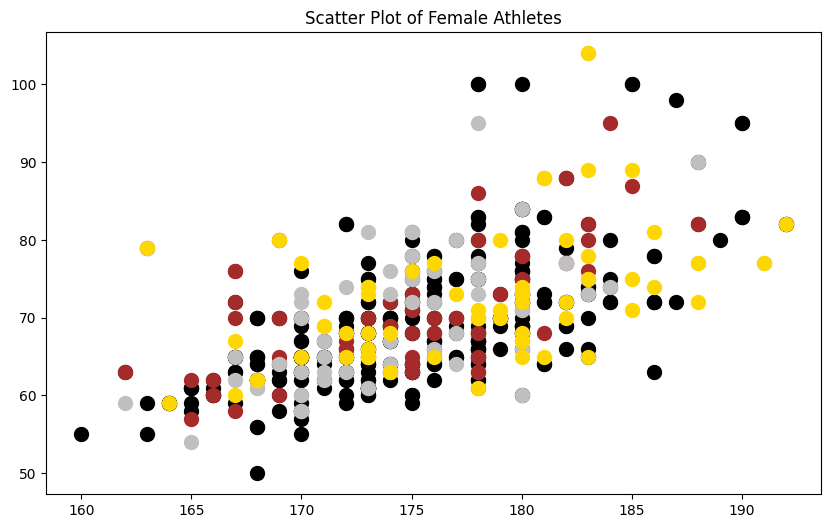

In [ ]:
plt.figure(figsize=(10, 6))
for medal, color in color_mapping.items():
    subset = X_female[X_female['Medal'] == medal]
    plt.scatter(subset['Height'], subset['Weight'], s=100, c=color, label=f'Medal {medal}')
    plt.title('Scatter Plot of Female Athletes')

In [ ]:
# 남성 데이터셋
X_male = X[X["Sex"] == "M"].reset_index(drop=True)
X_male = X_male[['Age', 'Height', 'Weight', 'Year','Medal']]
print(X_male.shape)
X_male.head()

(2231, 5)


,Age,Height,Weight,Year,Medal
0,22.0,186.0,83.0,1996,3
1,30.0,186.0,100.0,2004,0
2,25.0,188.0,92.0,2004,0
3,34.0,178.0,74.0,1976,0
4,18.0,176.0,78.0,1984,0


In [ ]:
# 상관관계 계산
correlation = X_male['BMI'].corr(X_male['Medal'])
print(f'BMI와 메달 획득 간의 상관계수: {correlation}')

# p-value 계산
from scipy.stats import pearsonr
corr, p_value = pearsonr(X_male['BMI'], X_male['Medal'])
print(f'p-value: {p_value}')

BMI와 메달 획득 간의 상관계수: 0.06933160463663758
p-value: 0.0010496095103665773


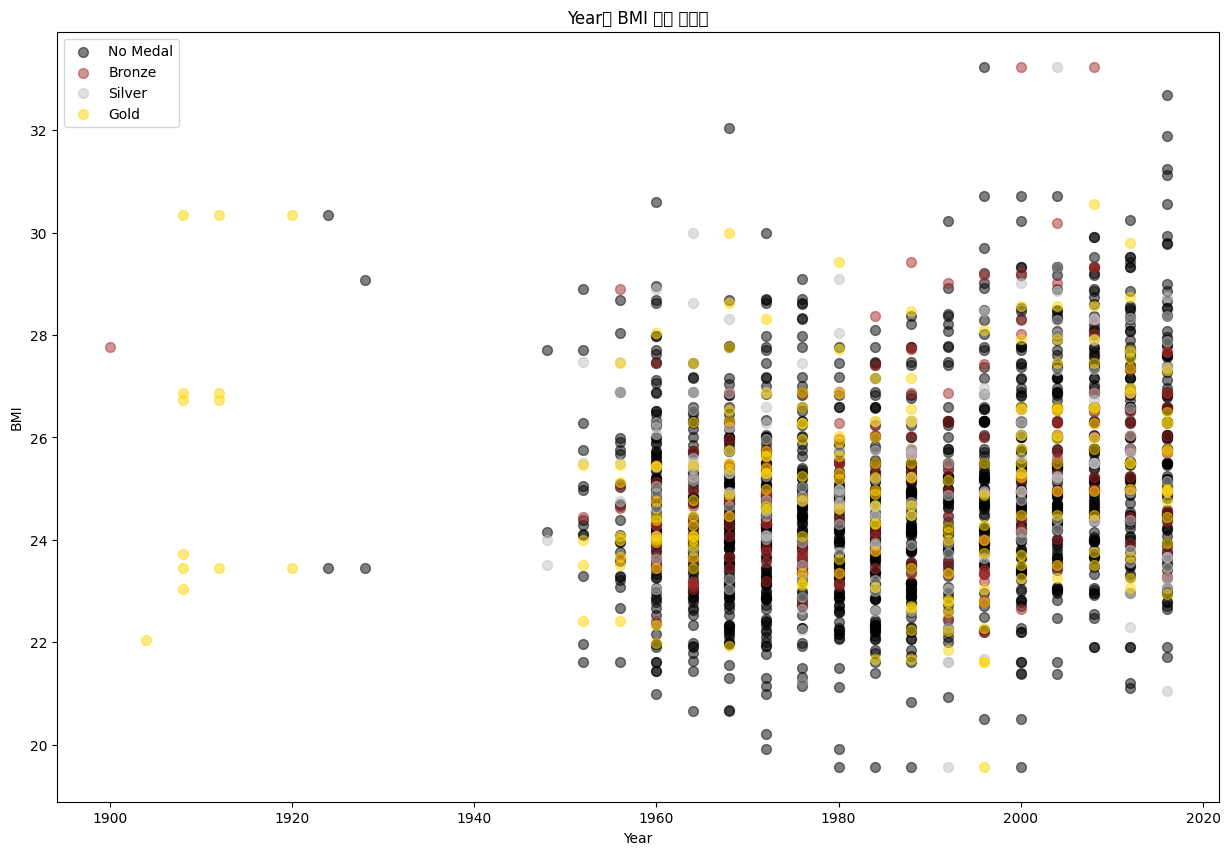

In [ ]:
# 색상 설정 (메달 종류에 따라 색상 다르게)
color_mapping = {0: 'black', 1: 'brown', 2: 'silver', 3: 'gold'}
X_male['Color'] = X_male['Medal'].map(color_mapping)

# BMI와 Year 간의 관계 시각화
plt.figure(figsize=(15, 10))
for medal, color in color_mapping.items():
    subset = X_male[X_male['Medal'] == medal]
    plt.scatter(subset['Year'], subset['BMI'], s=50, c=color, label=f'Medal {medal}', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('BMI')
plt.title('Year와 BMI 간의 산점도')
plt.legend(['No Medal', 'Bronze', 'Silver', 'Gold'])
plt.show()

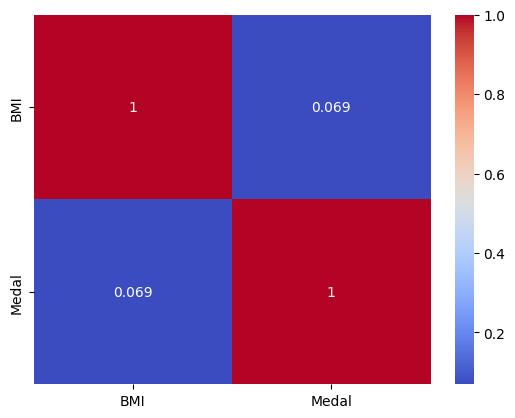

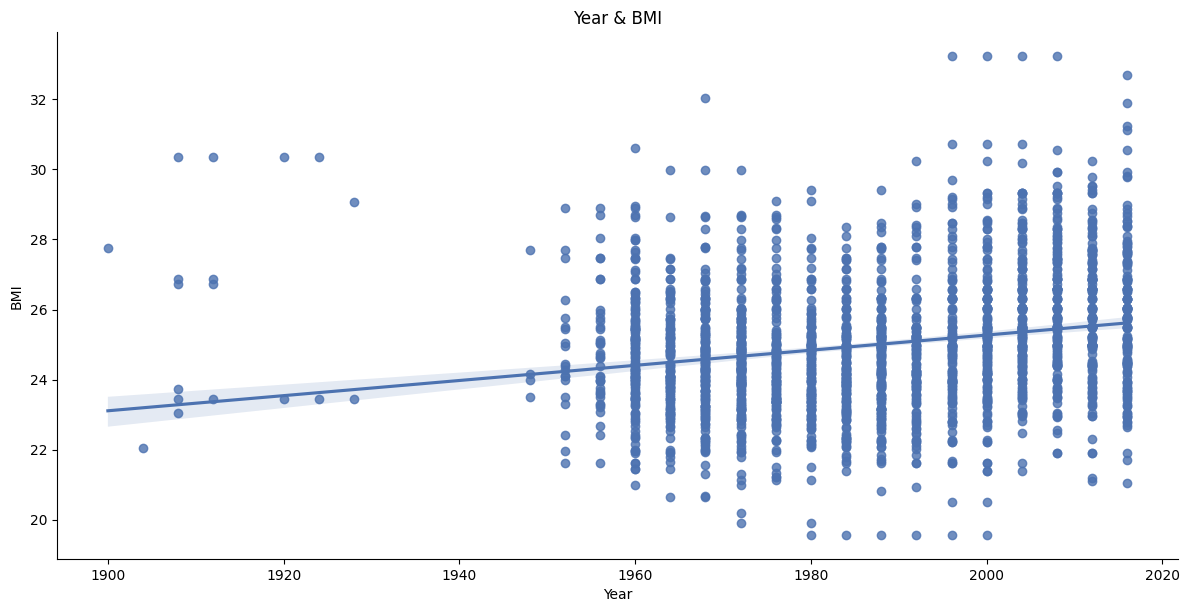

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# 상관관계 히트맵 그리기
sns.heatmap(X_male[['BMI', 'Medal']].corr(), annot=True, cmap='coolwarm')
plt.show()

# BMI와 메달 획득 간의 관계 시각화
sns.lmplot(x='Year', y='BMI', data=X_male, aspect=2, height=6)
plt.xlabel('Year')
plt.ylabel('BMI')
plt.title('Year & BMI')
plt.show()

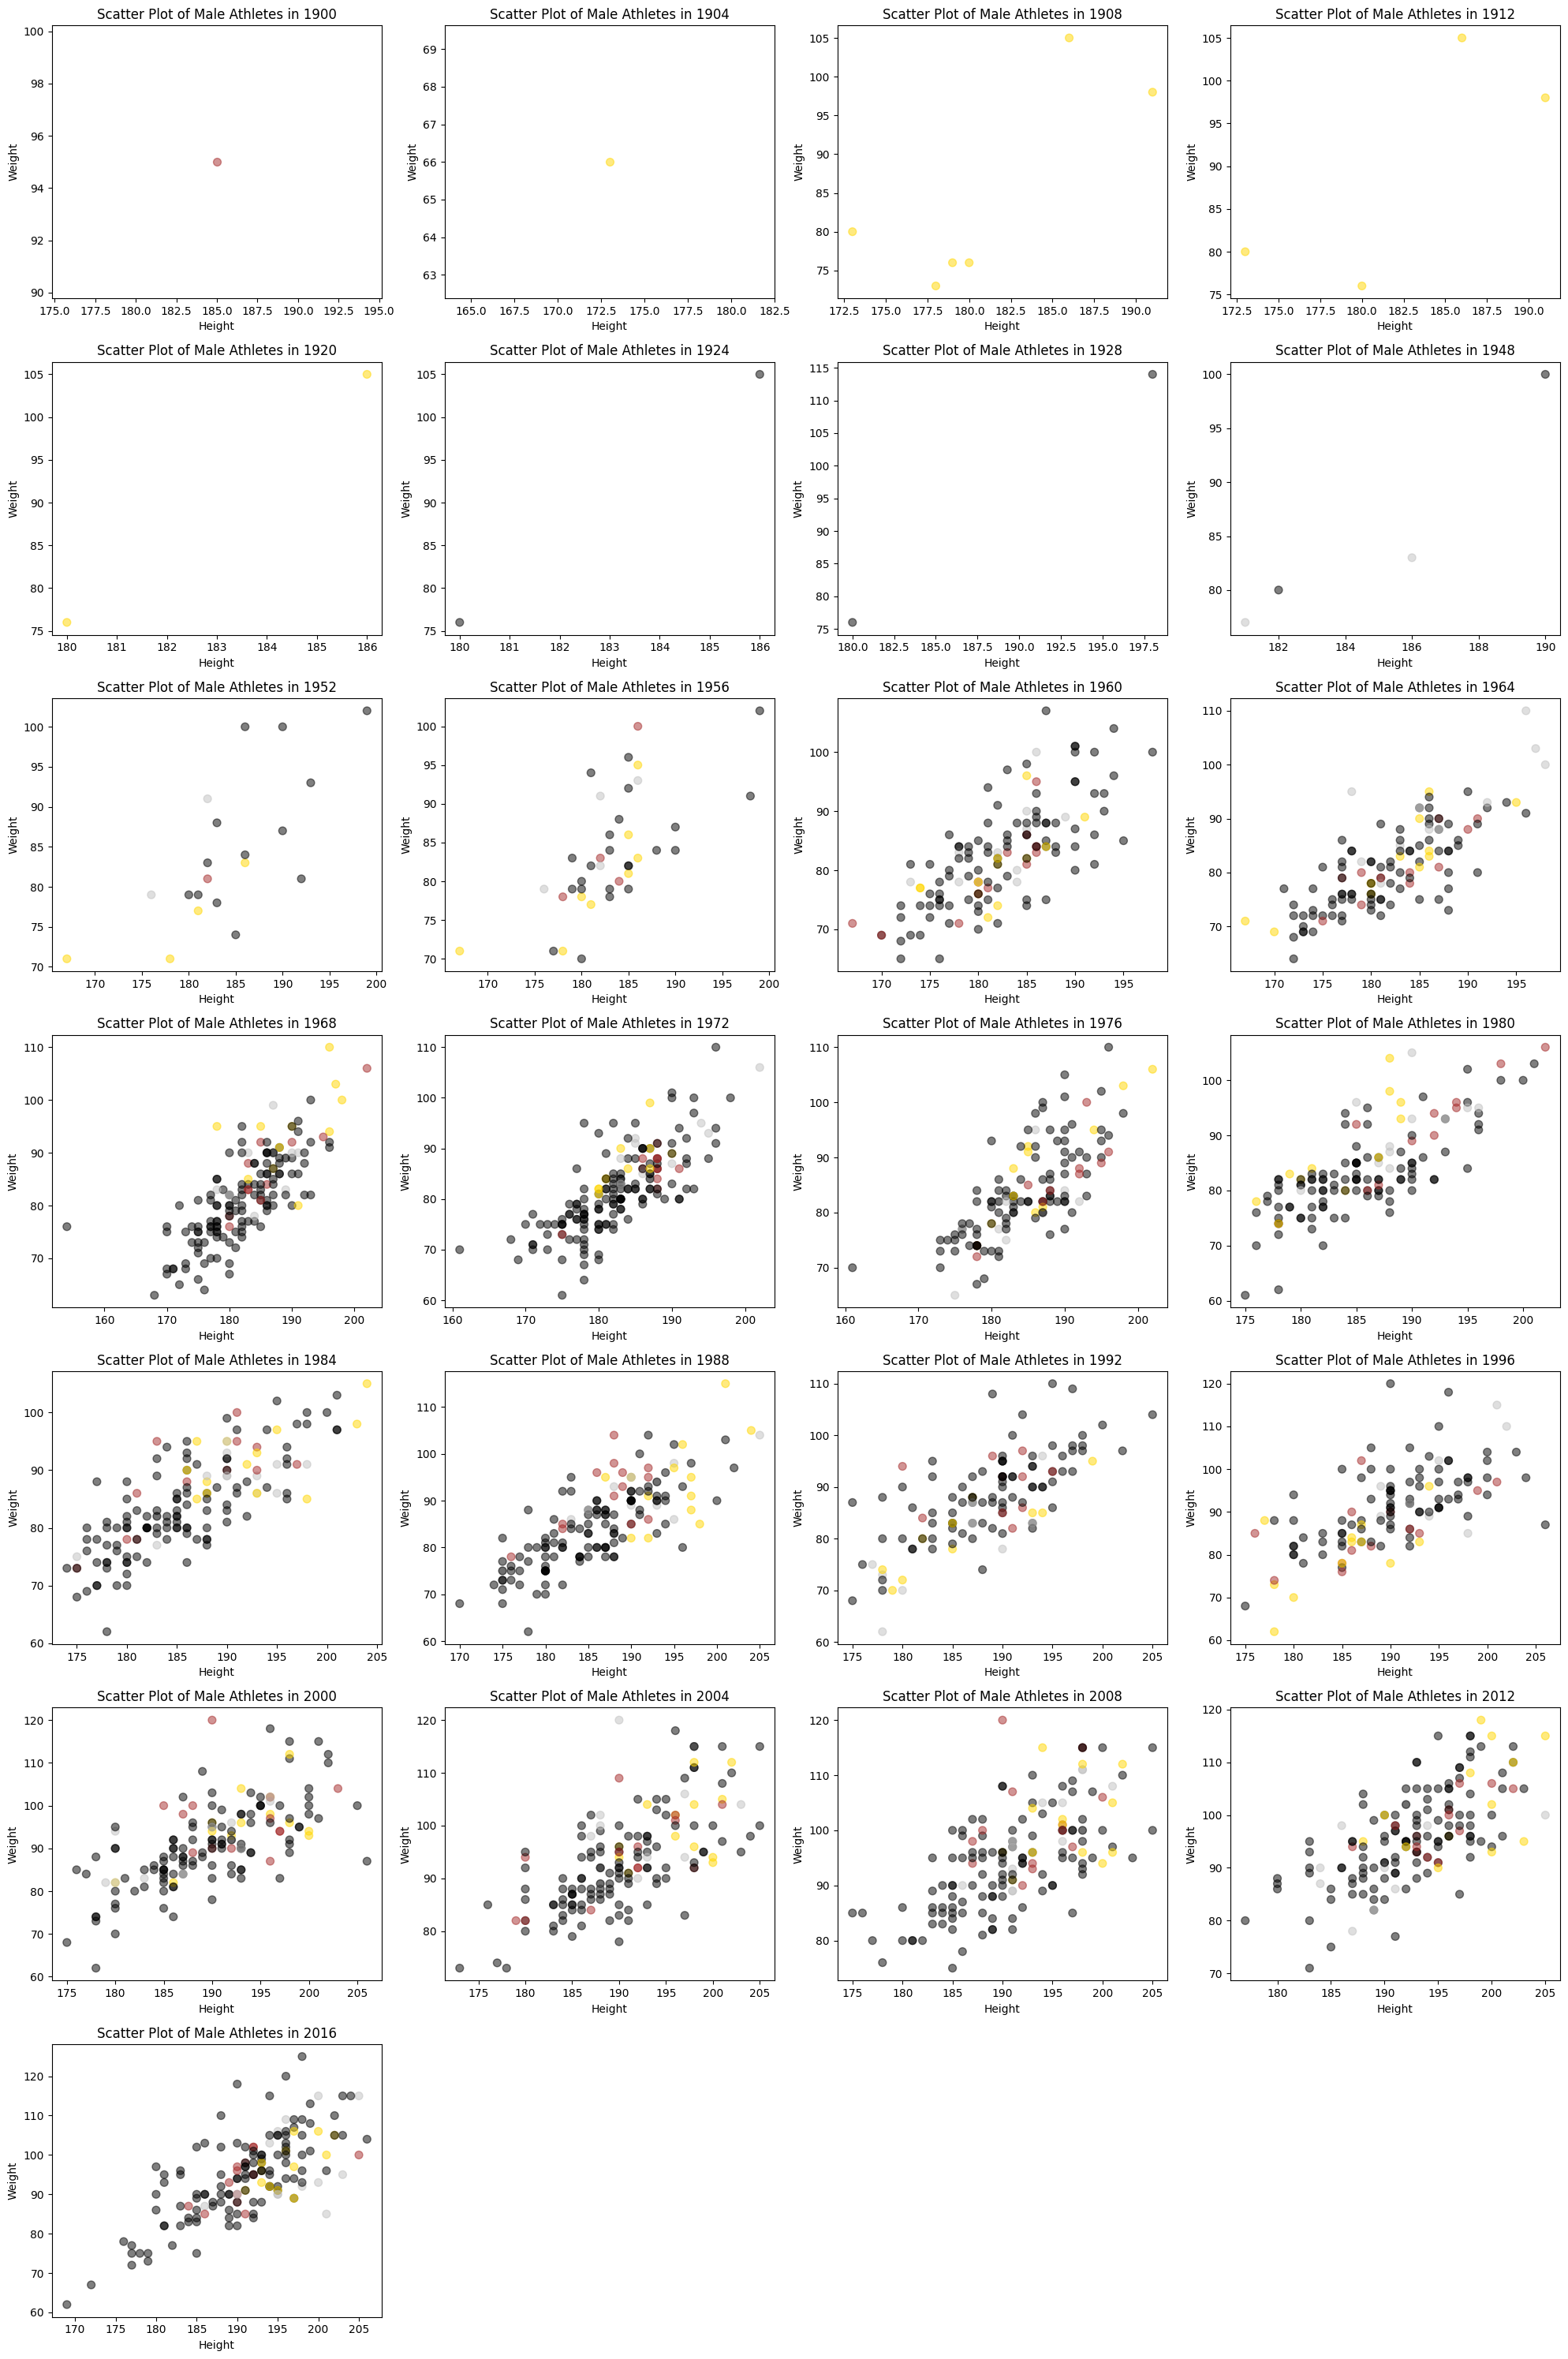

In [ ]:
# 군집 모델 적용
kmeans = KMeans(n_clusters=4, random_state=42)
X_male['Cluster'] = kmeans.fit_predict(X_male)

# 색상 설정 (메달 종류에 따라 색상 다르게)
color_mapping = {0: 'black', 1: 'brown', 2: 'silver', 3: 'gold'}
X_male['Color'] = X_male['Medal'].map(color_mapping)

# 산점도 그리기
years = sorted(X_male['Year'].unique())  # 데이터셋에서 사용된 모든 년도 목록
num_plots = len(years)

fig, axes = plt.subplots(math.ceil(num_plots / 4), 4, figsize=(20, 30))
axes = axes.flatten()  # 다차원 배열을 1차원으로 펼침

for i, year in enumerate(years):
    subset = X_male[X_male['Year'] == year]
    ax = axes[i]
    ax.scatter(subset['Height'], subset['Weight'], s=50, c=subset['Color'], alpha=0.5)
    ax.set_xlabel('Height')
    ax.set_ylabel('Weight')
    ax.set_title(f'Scatter Plot of Male Athletes in {year}')

# 남는 subplot은 비워둠
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(wspace=0.7, hspace=0.7)
plt.tight_layout()
plt.show()

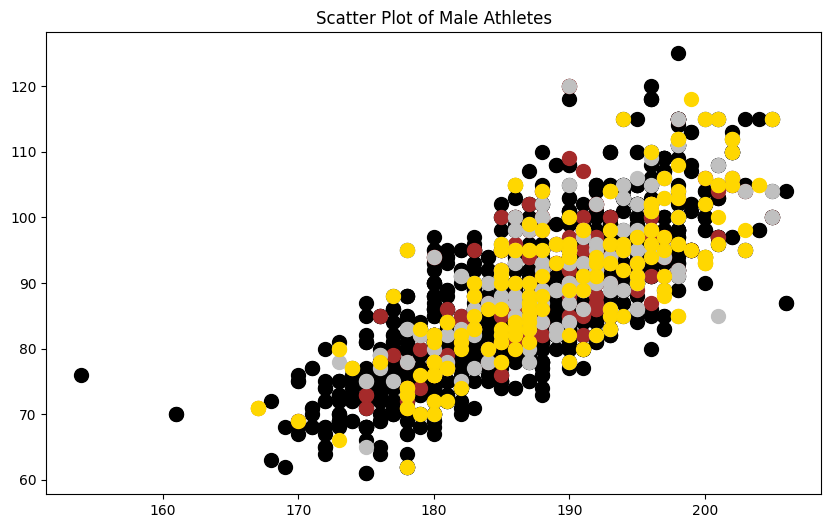

In [ ]:
plt.figure(figsize=(10, 6))
for medal, color in color_mapping.items():
    subset = X_male[X_male['Medal'] == medal]
    plt.scatter(subset['Height'], subset['Weight'], s=100, c=color, label=f'Medal {medal}')
    plt.title('Scatter Plot of Male Athletes')